## Introduction

We are working with simulated devices

## Connecting to devices

To connect any device, first you have to import the class that defines your device and then instantiate it.

You may find a list of supported devices and their corresponding classes [here](https://python-microscope.org/doc/architecture/supported-devices)

In [1]:
# TODO: Fix simcamera enum settings
# Some stuff we will need later on
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from microscope.simulators import SimulatedLightSource

light_source = SimulatedLightSource()

## Using devices

### Predefined properties

Each device type (Camera, LightSource, Stage,...) has a set of ***predefined properties*** and methods/functions that are going to be shared between any device of that type.

For example a light source can be turned on and off and can change its power output.

In [2]:
# Checking the status of a light source
light_source.enabled

False

Checking the status of the laser returns a very convenient and "pythonic" ```False```. It is a good thing that lasers are off when we connect to them.

Let us turn it on 

In [3]:
light_source.enable()
light_source.enabled

True

Let's now change the power of the light source. But first lets turn it off.

In [4]:
print("Turning off light source")
light_source.disable()
print("Light source power is:")
light_source.power

Turning off light source
Light source power is:


0.0

Light source powers are expressed relative to their nominal power. as values between 0 and 1.

In [5]:
print("Setting the power at 75 %")
light_source.power = 0.75
print(f"Current power is: {light_source.power * 100} %")
print("Oops! We have to turn on the light...")
light_source.enable()
print(f"Current power is: {light_source.power * 100} %")
time.sleep(1)
light_source.disable()
print("Shutting down...")
light_source.shutdown()
print(f"Lights on? {light_source.get_is_enabled()}")

Setting the power at 75 %
Current power is: 0.0 %
Oops! We have to turn on the light...
Current power is: 75.0 %
Shutting down...
Lights on? False


Cameras have a different set of properties, like **exposure time** or the ROI.

In [6]:
from microscope.simulators import SimulatedCamera

camera = SimulatedCamera()

camera.enable()
print(f"exposure time: {camera.get_exposure_time()} seconds")
camera.set_exposure_time(.2)
print(f"exposure time: {camera.get_exposure_time()} seconds")

print(f"ROI: {camera.get_roi()}")
camera.set_roi((128, 128, 256, 256))
print(f"ROI: {camera.get_roi()}")
camera.set_setting("display image number", False)

exposure time: 0.1 seconds
exposure time: 0.2 seconds
ROI: ROI(left=0, top=0, width=512, height=512)
ROI: ROI(left=128, top=128, width=256, height=256)


In order to get images from a camera, we first need to create a buffer to store them and pass it to the camera.

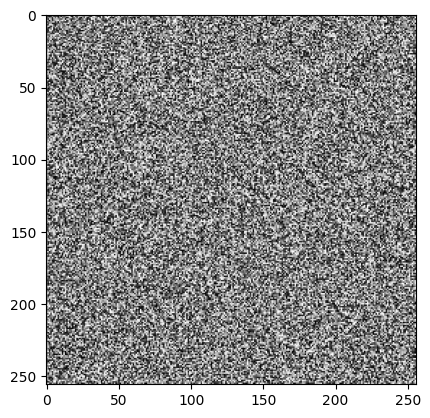

In [12]:
import queue

buffer = queue.Queue()
camera.set_client(buffer)
camera.trigger()  # acquire image

image = buffer.get()  # retrieve image

plt.imshow(image, cmap="gray")
    

TypeError: Invalid shape (1, 256, 256) for image data

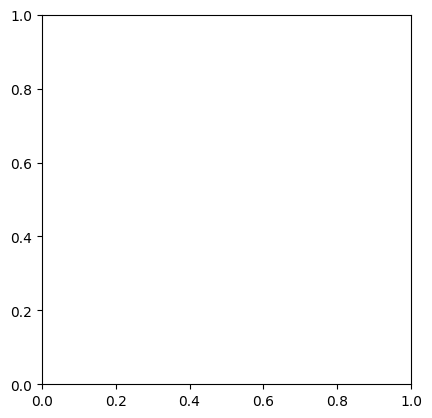

In [16]:
fig, ax = plt.subplots()

nr_images = 2

images = []
for i in range(nr_images):
    camera.trigger()
    # images.append(buffer.get())

    # if i == 0:
    #     ax.imshow(buffer.get())  # show an initial one first
    images.append(ax.imshow(buffer.get(), animated=True))

ani = animation.ArtistAnimation(fig, images, interval=50, blit=True,
                                repeat_delay=100)
plt.show()

### Device specific properties

Devices from different manufacturers may have settings that are unique to them. This is more common with complex devices such as cameras.
Our simulated camera has some settings that are unique to a simulated camera, such as what type of image has to be produced.

You may explore all the settings of a camera using the ```describe_settings``` function. 
The output of this function is only useful for computers, so we can prettify it a bit

In [ ]:
for setting in camera.describe_settings():
    print(f"name: {setting[0]}")
    print(f"type: {setting[1]['type']}")
    print(f"values: {setting[1]['values']}")
    print(f"readonly: {setting[1]['readonly']}")
    print(f"cached: {setting[1]['cached']}")
    print()
    

You may access the device specific settings through their name

In [ ]:
print(f"image pattern: {camera.get_setting('image pattern')}")
camera.set_setting('image pattern', 1)
print(f"image pattern: {camera.get_setting('image pattern')}")

In [ ]:
type(camera.get_setting("image pattern"))